# Flight Price Prediction

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
train_data = pd.read_excel(r"/content/drive/MyDrive/Colab Notebooks/Datasets/Data_Train.xlsx")
train_data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
train_data.shape

(10683, 11)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
train_data["Duration"].value_counts()

Duration
2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: count, Length: 368, dtype: int64

In [ ]:
train_data.dropna(inplace = True)

In [ ]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

---

#EDA

In [ ]:
train_data["Journey_day"] = pd.to_datetime(train_data.Date_of_Journey, format="%d/%m/%Y").dt.day

In [ ]:
train_data["Journey_month"] = pd.to_datetime(train_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month

In [ ]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [ ]:
# Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no use.
train_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [ ]:
# Departure time is when a plane leaves the gate.
# Similar to Date_of_Journey we can extract values from Dep_Time

# Extracting Hours
train_data["Dep_hour"] = pd.to_datetime(train_data["Dep_Time"]).dt.hour

# Extracting Minutes
train_data["Dep_min"] = pd.to_datetime(train_data["Dep_Time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
train_data.drop(["Dep_Time"], axis = 1, inplace = True)

<ipython-input-63-923473a736fb>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_data["Dep_hour"] = pd.to_datetime(train_data["Dep_Time"]).dt.hour
<ipython-input-63-923473a736fb>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_data["Dep_min"] = pd.to_datetime(train_data["Dep_Time"]).dt.minute


In [ ]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [ ]:
# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time

# Extracting Hours
train_data["Arrival_hour"] = pd.to_datetime(train_data.Arrival_Time).dt.hour

# Extracting Minutes
train_data["Arrival_min"] = pd.to_datetime(train_data.Arrival_Time).dt.minute

# Now we can drop Arrival_Time as it is of no use
train_data.drop(["Arrival_Time"], axis = 1, inplace = True)

<ipython-input-65-06767d82511c>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_data["Arrival_hour"] = pd.to_datetime(train_data.Arrival_Time).dt.hour
<ipython-input-65-06767d82511c>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_data["Arrival_min"] = pd.to_datetime(train_data.Arrival_Time).dt.minute


In [ ]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [ ]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time

# Assigning and converting Duration column into list
duration = list(train_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [ ]:
# Adding duration_hours and duration_mins list to train_data dataframe

train_data["Duration_hours"] = duration_hours
train_data["Duration_mins"] = duration_mins

In [ ]:
train_data.drop(["Duration"], axis = 1, inplace = True)

In [ ]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


---

# Handling Categorical Data



In [ ]:
train_data["Airline"].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [ ]:
train_data["Source"].value_counts()

Source
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

In [ ]:
train_data["Destination"].value_counts()

Destination
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

In [ ]:
train_data["Route"].value_counts()

Route
DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: count, Length: 128, dtype: int64

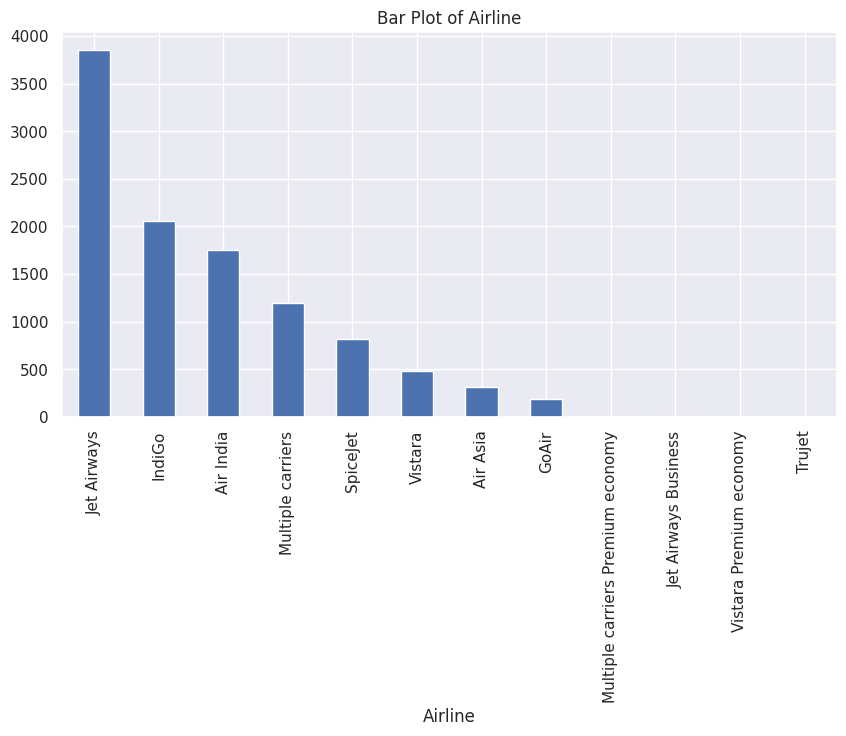

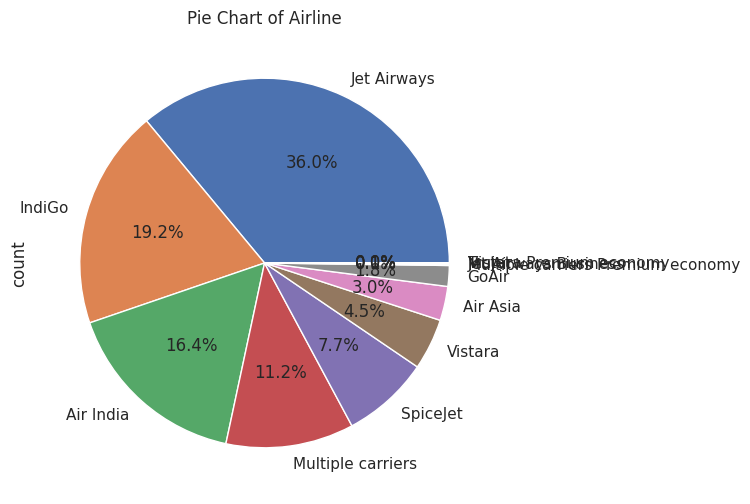

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have a pandas DataFrame named 'df' with columns 'A', 'B', and 'C'

# Bar plot
plt.figure(figsize=(10, 5))
train_data['Airline'].value_counts().plot(kind='bar')
plt.title('Bar Plot of Airline')
plt.show()
print("===========================================================================================================\n\n")

# Pie chart
plt.figure(figsize=(6, 6))
train_data['Airline'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Pie Chart of Airline')
plt.show()
print("===========================================================================================================\n\n")

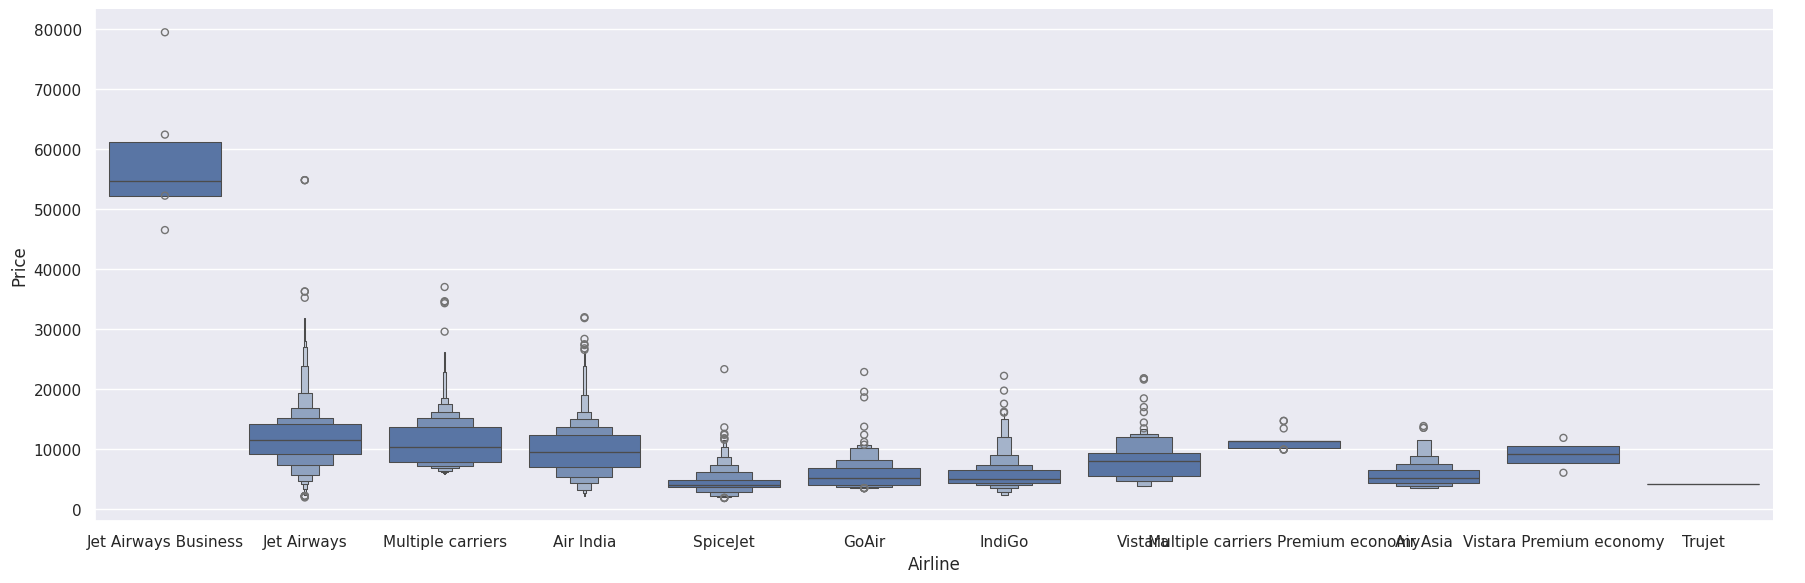

In [ ]:
# From graph we can see that Jet Airways Business have the highest Price.
# Apart from the first Airline almost all are having similar median
# Airline vs Price
sns.catplot(y = "Price", x = "Airline", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

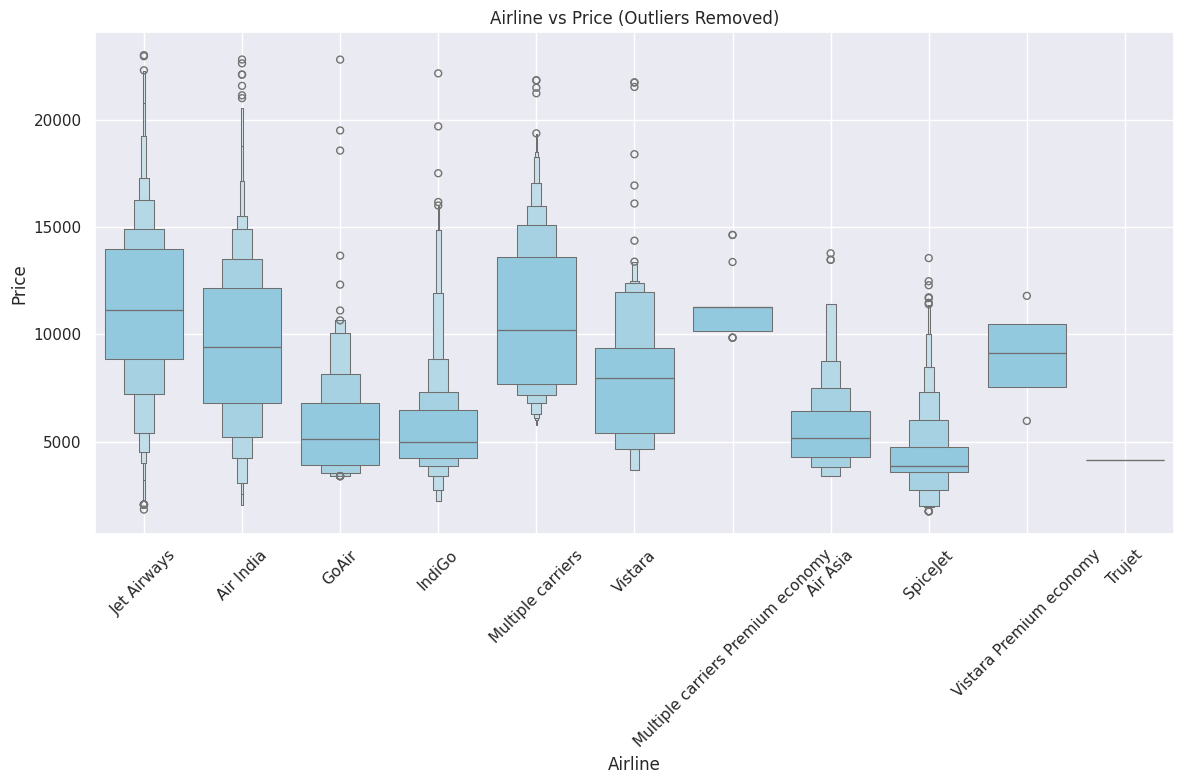

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'train_data' with columns 'Airline' and 'Price'

# Calculate the Interquartile Range (IQR)
Q1 = train_data['Price'].quantile(0.25)
Q3 = train_data['Price'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds to filter outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the data to remove outliers
filtered_data = train_data[(train_data['Price'] >= lower_bound) & (train_data['Price'] <= upper_bound)]

# Plot the boxen plot without outliers
plt.figure(figsize=(12, 8))
sns.boxenplot(y="Price", x="Airline", data=filtered_data.sort_values("Price", ascending=False), color='skyblue', width=0.8)

# Customize the plot appearance
plt.title('Airline vs Price (Outliers Removed)')
plt.xticks(rotation=45)
plt.ylabel('Price')
plt.xlabel('Airline')
plt.grid(True)

plt.tight_layout()
plt.show()


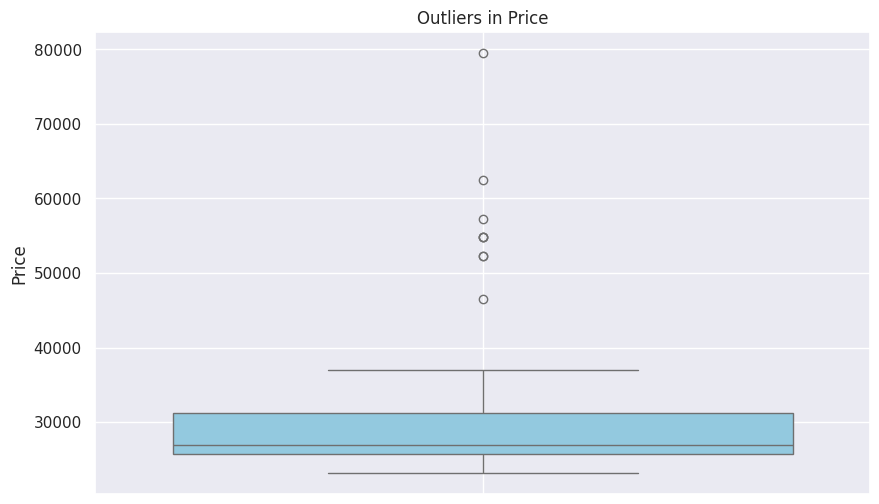

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'train_data' with columns 'Airline' and 'Price'

# Calculate the Interquartile Range (IQR)
Q1 = train_data['Price'].quantile(0.25)
Q3 = train_data['Price'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the data to get outliers
outliers_data = train_data[(train_data['Price'] < lower_bound) | (train_data['Price'] > upper_bound)]

# Plot outliers using a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(y="Price", data=outliers_data, color='skyblue')
plt.title('Outliers in Price')
plt.ylabel('Price')
plt.grid(True)
plt.show()


Original shape: (10682, 15)
Shape after removing outliers: (10588, 15)


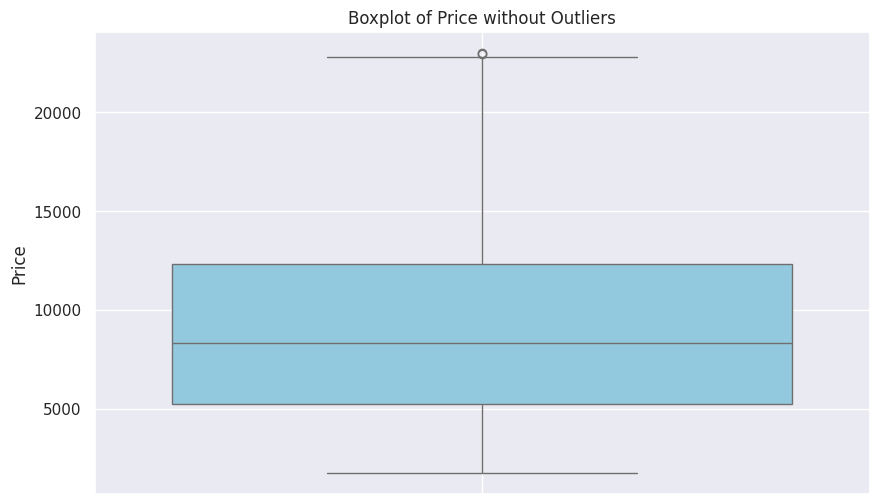

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'train_data' with columns 'Price'

# Calculate the Interquartile Range (IQR)
Q1 = train_data['Price'].quantile(0.25)
Q3 = train_data['Price'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the data to remove outliers
train_data_no_outliers = train_data[(train_data['Price'] >= lower_bound) & (train_data['Price'] <= upper_bound)]

# Check the shape to see how many outliers were removed
print("Original shape:", train_data.shape)
print("Shape after removing outliers:", train_data_no_outliers.shape)

# Plot boxplot of outliers
plt.figure(figsize=(10, 6))
sns.boxplot(y="Price", data=train_data_no_outliers, color='skyblue')
plt.title('Boxplot of Price without Outliers')
plt.ylabel('Price')
plt.grid(True)
plt.show()

# Optionally, if you want to overwrite the original DataFrame with the one without outliers
# train_data = train_data_no_outliers


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 94.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 89.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 90.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 90.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 67.5% of the points cannot be plac

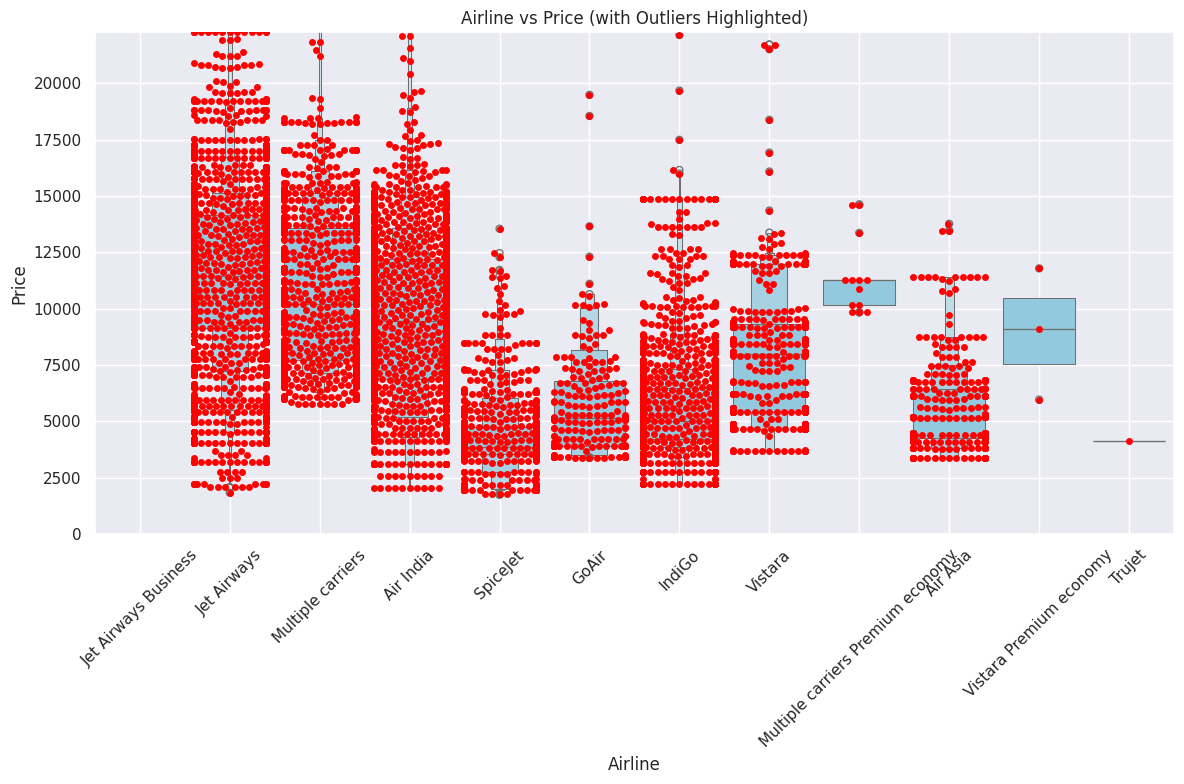

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'train_data' with columns 'Airline' and 'Price'

# Customize the boxen plot
plt.figure(figsize=(12, 8))
sns.boxenplot(y="Price", x="Airline", data=train_data.sort_values("Price", ascending=False), color='skyblue', width=0.8)

# Highlight outliers
sns.swarmplot(y="Price", x="Airline", data=train_data, color='red', size=5)  # Mark outliers with red dots

# Customize the plot appearance
plt.title('Airline vs Price (with Outliers Highlighted)')
plt.xticks(rotation=45)
plt.ylabel('Price')
plt.xlabel('Airline')
plt.ylim(0, train_data['Price'].quantile(0.99))  # Set y-axis limits to zoom in on the data (adjust as needed)
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding

Airline = train_data[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,False,False,True,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,False


In [ ]:
train_data["Source"].value_counts()

Source
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

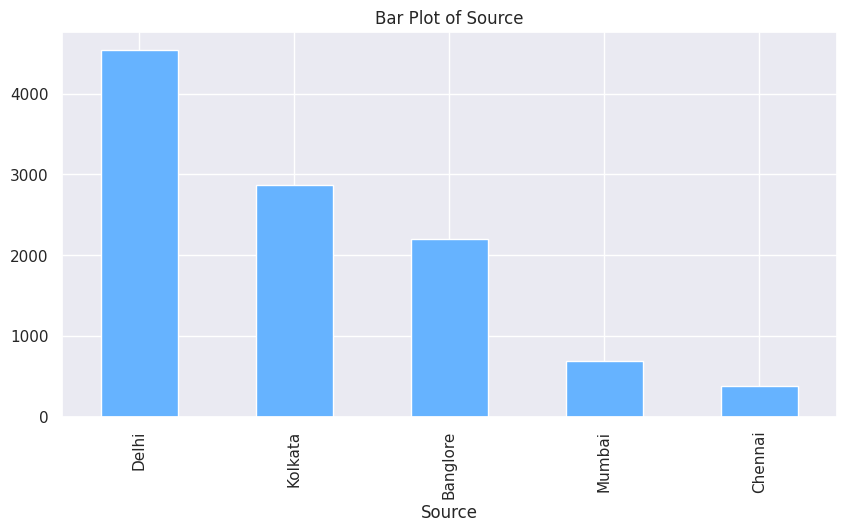

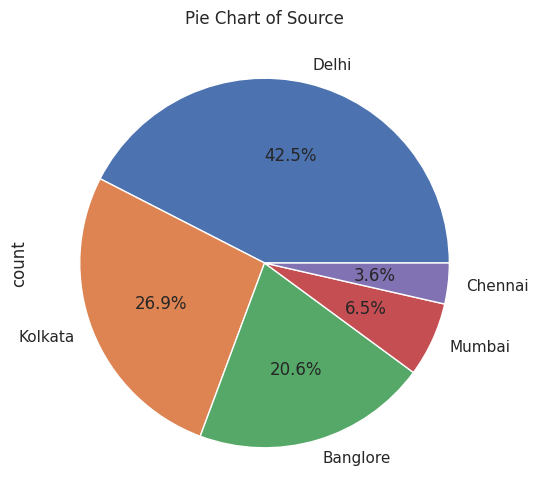

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have a pandas DataFrame named 'df' with columns 'A', 'B', and 'C'

# Bar plot
plt.figure(figsize=(10, 5))
train_data['Source'].value_counts().plot(kind='bar', color='#66b3ff')
plt.title('Bar Plot of Source')
plt.show()
print("===========================================================================================================\n\n")

# Pie chart
plt.figure(figsize=(6, 6))
train_data['Source'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Pie Chart of Source')
plt.show()
print("===========================================================================================================\n\n")

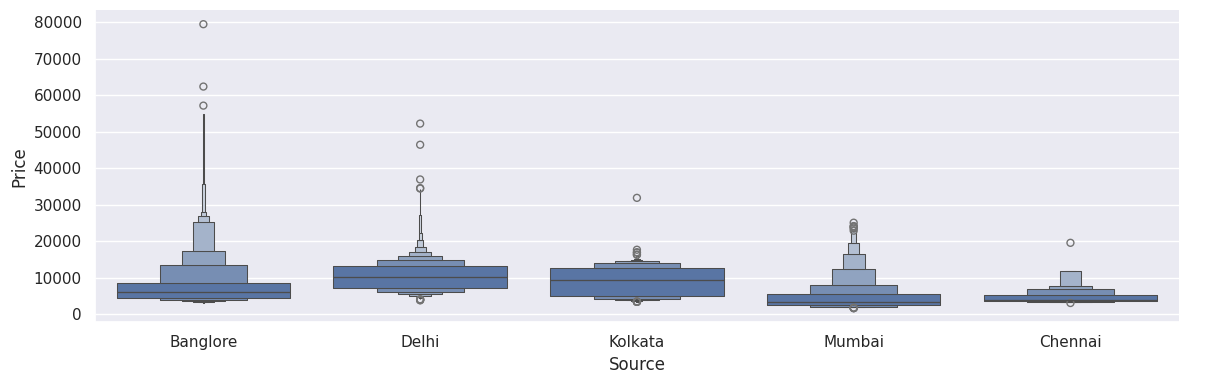

In [ ]:
# Source vs Price

sns.catplot(y = "Price", x = "Source", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

In [ ]:
# As Source is Nominal Categorical data we will perform OneHotEncoding

Source = train_data[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,False,False,False,False
1,False,False,True,False
2,False,True,False,False
3,False,False,True,False
4,False,False,False,False


In [ ]:
train_data["Destination"].value_counts()

Destination
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

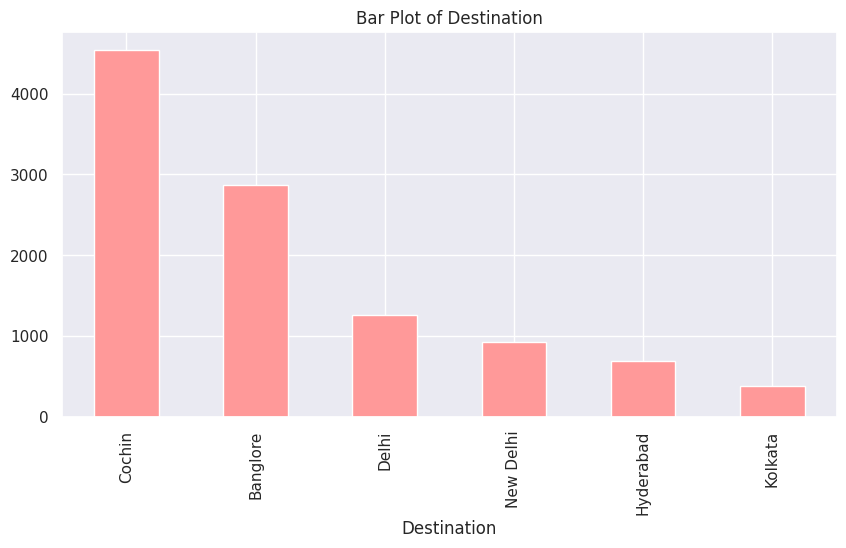

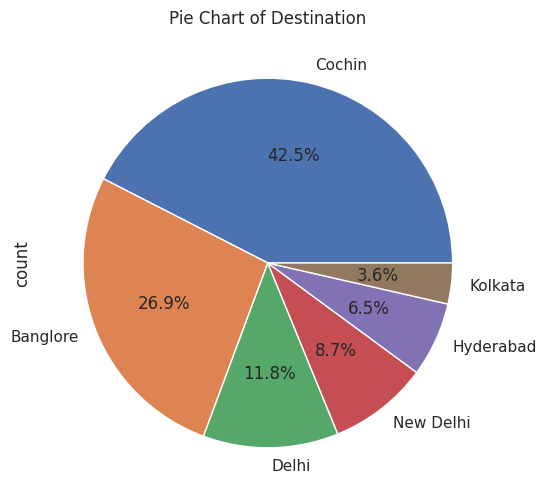

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have a pandas DataFrame named 'df' with columns 'A', 'B', and 'C'

# Bar plot
plt.figure(figsize=(10, 5))
#colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#cc99ff']  # specify your desired colors here
train_data['Destination'].value_counts().plot(kind='bar', color='#ff9999')
plt.title('Bar Plot of Destination')
plt.show()
print("===========================================================================================================\n\n")

# Pie chart
plt.figure(figsize=(6, 6))
train_data['Destination'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Pie Chart of Destination')
plt.show()
print("===========================================================================================================\n\n")

In [ ]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = train_data[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,False,False,False,False,True
1,False,False,False,False,False
2,True,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,True


In [ ]:
train_data["Route"]

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [ ]:
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other

train_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [ ]:
train_data["Total_Stops"].value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

In [ ]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys

train_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [ ]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [ ]:
# Concatenate dataframe --> train_data + Airline + Source + Destination

data_train = pd.concat([train_data, Airline, Source, Destination], axis = 1)

In [ ]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [ ]:
data_train.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [ ]:
data_train.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,2,7662,1,5,5,50,13,15,7,25,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,2,13882,9,6,9,25,4,25,19,0,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
3,1,6218,12,5,18,5,23,30,5,25,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,1,13302,1,3,16,50,21,35,4,45,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [ ]:
data_train.shape

(10682, 30)

# Handling Outlier

In [ ]:
import numpy as np
import pandas as pd

# Load your dataset
train_data = pd.read_excel(r"/content/drive/MyDrive/Colab Notebooks/Datasets/Data_Train.xlsx")

# Assuming 'Price' is the column with potential outliers
column_with_outliers = 'Price'

# Calculate IQR
Q1 = train_data[column_with_outliers].quantile(0.25)
Q3 = train_data[column_with_outliers].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = train_data[(train_data[column_with_outliers] < lower_bound) | (train_data[column_with_outliers] > upper_bound)]

# Remove outliers
train_data_cleaned = train_data.drop(outliers.index)

# Check the shape before and after removing outliers
print("Shape before removing outliers:", train_data.shape)
print("Shape after removing outliers:", train_data_cleaned.shape)


Shape before removing outliers: (10683, 11)
Shape after removing outliers: (10589, 11)


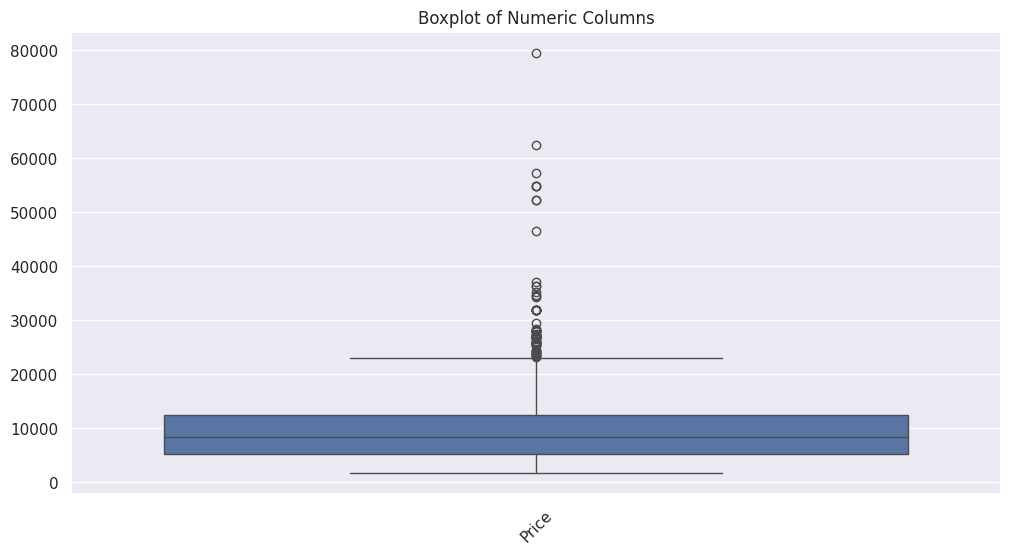

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
train_data = pd.read_excel(r"/content/drive/MyDrive/Colab Notebooks/Datasets/Data_Train.xlsx")

# Filter numeric columns to plot boxplots
numeric_columns = train_data.select_dtypes(include=[np.number])

# Plot boxplots for numeric columns
plt.figure(figsize=(12, 6))
sns.boxplot(data=numeric_columns)
plt.title('Boxplot of Numeric Columns')
plt.xticks(rotation=45)
plt.show()


---

# Test set

In [ ]:
test_data = pd.read_excel(r"/content/drive/MyDrive/Colab Notebooks/Datasets/Test_set.xlsx")
test_data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [ ]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


#Test Data Preprocessing

In [ ]:
print("Test data Info")
print("-"*75)
print(test_data.info())
print("\n======================================================================================================\n\n")

print("Null values :")
print("-"*75)
test_data.dropna(inplace = True)
print(test_data.isnull().sum())
print("\n======================================================================================================\n\n")


Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None



Null values :
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time        

#EDA on Test Data

In [ ]:
# Date_of_Journey
test_data["Journey_day"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data["Journey_month"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)
test_data

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,5
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6
...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,6,6
2667,IndiGo,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,27,3
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,6,3
2669,Air India,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,6,3


In [ ]:
# Dep_Time
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)
test_data

<ipython-input-105-49a6e7a0c5bb>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
<ipython-input-105-49a6e7a0c5bb>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute


,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,04:25 07 Jun,10h 55m,1 stop,No info,6,6,17,30
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,10:20,4h,1 stop,No info,12,5,6,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5,19,15
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,21:00,13h,1 stop,No info,21,5,8,0
4,Air Asia,Banglore,Delhi,BLR → DEL,02:45 25 Jun,2h 50m,non-stop,No info,24,6,23,55
...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,20:25 07 Jun,23h 55m,1 stop,No info,6,6,20,30
2667,IndiGo,Kolkata,Banglore,CCU → BLR,16:55,2h 35m,non-stop,No info,27,3,14,20
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,04:25 07 Mar,6h 35m,1 stop,No info,6,3,21,50
2669,Air India,Delhi,Cochin,DEL → BOM → COK,19:15,15h 15m,1 stop,No info,6,3,4,0


In [ ]:
# Arrival_Time
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)
test_data

<ipython-input-106-1ac8047aefc9>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
<ipython-input-106-1ac8047aefc9>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute


,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,12,5,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,21,5,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,21,5,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,24,6,23,55,2,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,23h 55m,1 stop,No info,6,6,20,30,20,25
2667,IndiGo,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,27,3,14,20,16,55
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,6h 35m,1 stop,No info,6,3,21,50,4,25
2669,Air India,Delhi,Cochin,DEL → BOM → COK,15h 15m,1 stop,No info,6,3,4,0,19,15


In [ ]:
# Duration
duration = list(test_data["Duration"])

In [ ]:
for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)

#Handling Categorical Data

In [ ]:
print("Airline")
print("-"*75)
print(test_data["Airline"].value_counts())
Airline = pd.get_dummies(test_data["Airline"], drop_first= True)

print()

print("Source")
print("-"*75)
print(test_data["Source"].value_counts())
Source = pd.get_dummies(test_data["Source"], drop_first= True)

print()

print("Destination")
print("-"*75)
print(test_data["Destination"].value_counts())
Destination = pd.get_dummies(test_data["Destination"], drop_first = True)

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> test_data + Airline + Source + Destination
data_test = pd.concat([test_data, Airline, Source, Destination], axis = 1)

data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print()
print()

print("Shape of test data : ", data_test.shape)

Airline
---------------------------------------------------------------------------
Airline
Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: count, dtype: int64

Source
---------------------------------------------------------------------------
Source
Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: count, dtype: int64

Destination
---------------------------------------------------------------------------
Destination
Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: count, dtype: 

In [ ]:
data_test.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,17,30,4,25,10,55,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
1,1,12,5,6,20,10,20,4,0,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,1,21,5,19,15,19,0,23,45,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
3,1,21,5,8,0,21,0,13,0,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False
4,0,24,6,23,55,2,45,2,50,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


---





#Feature Selection

Finding out the best feature which will contribute and have good relation with target variable.
Following are some of the feature selection methods,


1. <span style="color: purple;">**heatmap**</span>
2. <span style="color: purple;">**feature_importance_**</span>
3. <span style="color: purple;">**SelectKBest**</span>

In [ ]:
data_train.shape

(10682, 30)

In [ ]:
data_train.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [ ]:
X = data_train.loc[:, ['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
X.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,2,1,5,5,50,13,15,7,25,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,2,9,6,9,25,4,25,19,0,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
3,1,12,5,18,5,23,30,5,25,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,1,1,3,16,50,21,35,4,45,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [ ]:
y = data_train.iloc[:, 1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

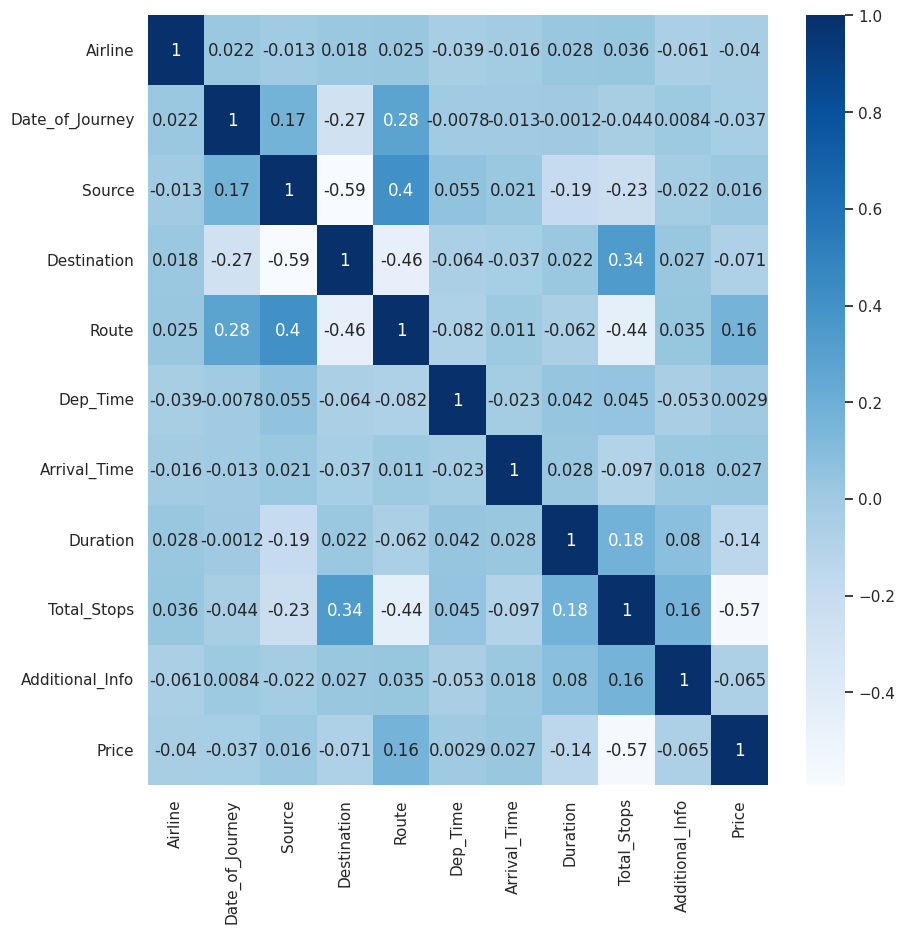

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Assuming train_data contains both numeric and categorical columns
# Encode categorical columns
label_encoders = {}
for column in train_data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    train_data[column] = label_encoders[column].fit_transform(train_data[column])

# Plot the heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(train_data.corr(), annot=True, cmap="Blues")
plt.show()


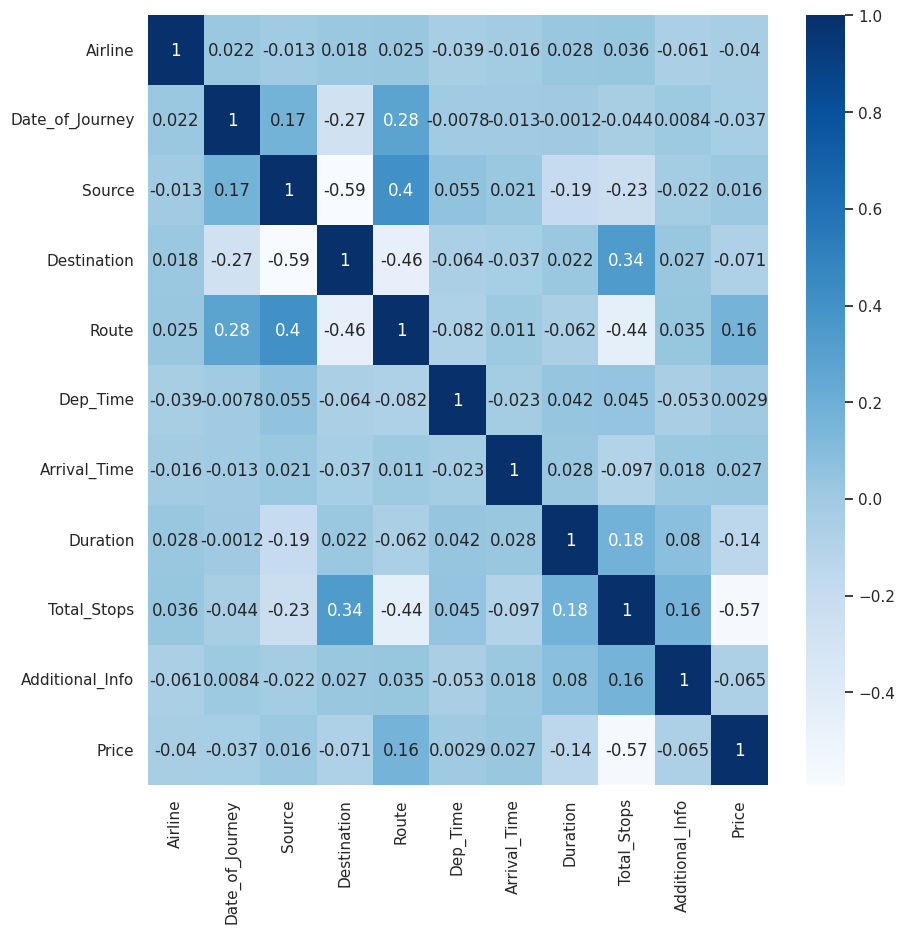

In [ ]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (10,10))
sns.heatmap(train_data.corr(), annot = True, cmap = "Blues")
plt.show()

In [ ]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [ ]:
print(selection.feature_importances_)

[2.37933323e-01 1.43858588e-01 5.42290674e-02 2.49446091e-02
 2.12764282e-02 2.77904787e-02 1.88301053e-02 1.09266115e-01
 1.74897876e-02 9.52819540e-03 2.04097878e-03 1.77429494e-02
 1.44207487e-01 6.74013072e-02 1.82317945e-02 8.85520944e-04
 3.18131740e-03 1.00175986e-04 5.24964476e-03 8.53924575e-05
 4.33555545e-04 7.25238252e-03 3.38597171e-03 5.70562550e-03
 1.12758931e-02 1.54098450e-02 7.05106646e-03 4.89276443e-04
 2.47231175e-02]


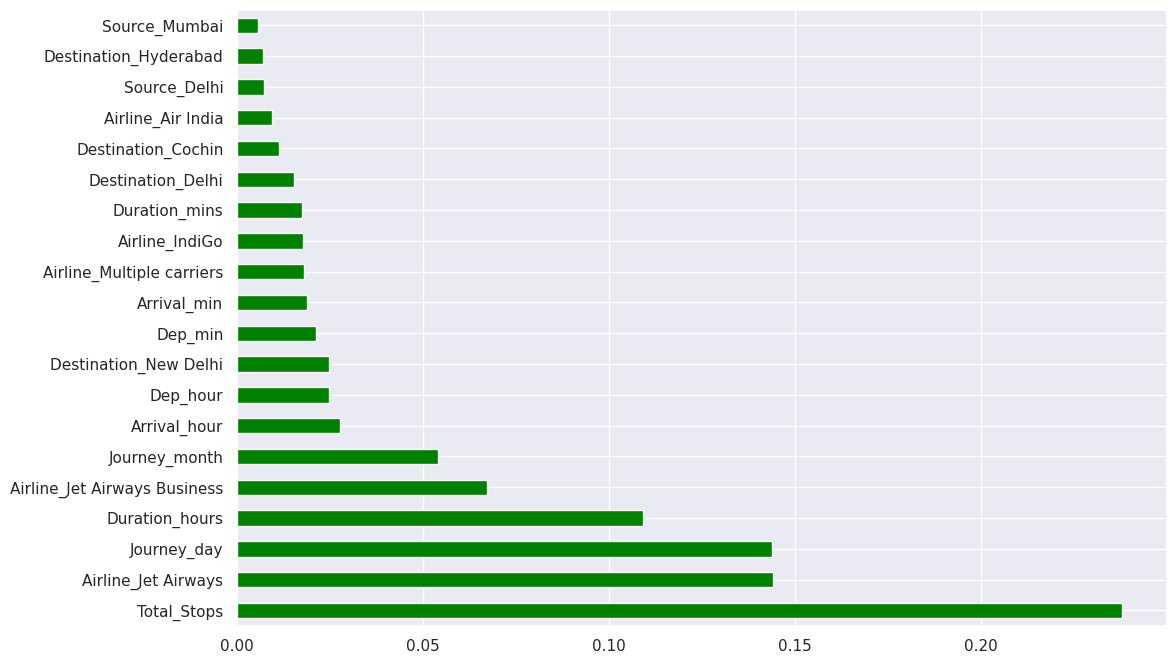

In [ ]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh', color = 'Green')
plt.show()

#XG Boost

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming you have already loaded and preprocessed your data into X_train, X_test, y_train, y_test

# Define the XGBoost regressor
xgb_regressor = XGBRegressor()

# Train the XGBoost regressor
xgb_regressor.fit(X_train, y_train)

# Make predictions on the test set
xgb_pred = xgb_regressor.predict(X_test)

# Calculate Mean Squared Error (MSE) or Root Mean Squared Error (RMSE)
mse_xgb = mean_squared_error(y_test, xgb_pred)
rmse_xgb = mean_squared_error(y_test, xgb_pred, squared=False)  # squared=False for RMSE

# Calculate Mean Absolute Error (MAE)
mae_xgb = mean_absolute_error(y_test, xgb_pred)

# Calculate R-squared (R2) score
r2_xgb = r2_score(y_test, xgb_pred)

print("XGBoost Regressor MSE:", mse_xgb)
print("XGBoost Regressor RMSE:", rmse_xgb)
print("XGBoost Regressor MAE:", mae_xgb)
print("XGBoost Regressor R-squared:", r2_xgb)


XGBoost Regressor MSE: 1721.689386717755
XGBoost Regressor RMSE: 41.49324507335808
XGBoost Regressor MAE: 32.9361414501472
XGBoost Regressor R-squared: 0.8979030055254257


# Bagging

In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming you have already loaded and preprocessed your data into X_train, X_test, y_train, y_test

# Define the base regressor (e.g., DecisionTreeRegressor) for the BaggingRegressor
base_regressor = DecisionTreeRegressor()

# Define the BaggingRegressor with the base regressor and desired parameters
bagging_regressor = BaggingRegressor(base_estimator=base_regressor, n_estimators=100, random_state=42)

# Train the BaggingRegressor
bagging_regressor.fit(X_train, y_train)

# Make predictions on the test set
bagging_pred = bagging_regressor.predict(X_test)

# Calculate Mean Squared Error (MSE) or Root Mean Squared Error (RMSE)
mse_bagging = mean_squared_error(y_test, bagging_pred)
rmse_bagging = mean_squared_error(y_test, bagging_pred, squared=False)  # squared=False for RMSE

# Calculate Mean Absolute Error (MAE)
mae_bagging = mean_absolute_error(y_test, bagging_pred)

# Calculate R-squared (R2) score
r2_bagging = r2_score(y_test, bagging_pred)

print("Bagging Regressor MSE:", mse_bagging)
print("Bagging Regressor RMSE:", rmse_bagging)
print("Bagging Regressor MAE:", mae_bagging)
print("Bagging Regressor R-squared:", r2_bagging)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging Regressor MSE: 2615.256773615992
Bagging Regressor RMSE: 51.13958128119541
Bagging Regressor MAE: 40.49726938677265
Bagging Regressor R-squared: 0.8449140370932442


In [ ]:
from sklearn.pipeline import make_pipeline
import xgboost as xgb
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

In [ ]:
xgb_classifier = make_pipeline(
    OneHotEncoder(),
    SimpleImputer(strategy='mean'),
    MinMaxScaler(),
    xgb.XGBClassifier(objective = 'binary:logistic', random_state = 42)
)
xgb_classifier

Pipeline(steps=[('onehotencoder', OneHotEncoder()),
                ('simpleimputer', SimpleImputer()),
                ('minmaxscaler', MinMaxScaler()),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_typ...ow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

#Models Training

In [ ]:
import pandas as pd

# Load train and test datasets
train_data = pd.read_excel(r"/content/drive/MyDrive/Colab Notebooks/Datasets/Data_Train.xlsx")
test_data = pd.read_excel(r"/content/drive/MyDrive/Colab Notebooks/Datasets/Test_set.xlsx")

# Display first 3 rows of train and test datasets
print(train_data.head(3))
print(test_data.head(3))

# Separate features (X) and target variable (y) in train dataset
X = train_data.drop("Price", axis=1)
print(X.head(2))

y = train_data["Price"]
print(y.head(2))

# Convert categorical variables into dummy/indicator variables
X = pd.get_dummies(X)
print(X.head(3))

train_data = pd.get_dummies(train_data)
test_data = pd.get_dummies(test_data)
print(train_data.head(3))
print(test_data.head(3))

# Split the data into training and cross-validation sets
from sklearn.model_selection import train_test_split

x_train, x_cv, y_train, y_cv = train_test_split(X, y, test_size=0.3, random_state=1)

Streaming output truncated to the last 5000 lines.
2                      False                      False   

   Arrival_Time_04:35 28 May  Arrival_Time_04:40 02 Apr  \
0                      False                      False   
1                      False                      False   
2                      False                      False   

   Arrival_Time_04:40 02 May  Arrival_Time_04:40 04 Apr  \
0                      False                      False   
1                      False                      False   
2                      False                      False   

   Arrival_Time_04:40 07 Jun  Arrival_Time_04:40 07 May  \
0                      False                      False   
1                      False                      False   
2                      False                      False   

   Arrival_Time_04:40 10 Jun  Arrival_Time_04:40 10 May  \
0                      False                      False   
1                      False                      False   
2

---

#Logistic Regression & SVM

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline

# Assuming X and y are already defined
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define regressors
lr_regressor = make_pipeline(StandardScaler(), LogisticRegression())
svm_regressor = make_pipeline(StandardScaler(), SVR())

# Train the regressors
lr_regressor.fit(X_train, y_train)
svm_regressor.fit(X_train, y_train)

# Predictions
lr_pred = lr_regressor.predict(X_test)
svm_pred = svm_regressor.predict(X_test)

# Calculate R-squared
r2_lr = r2_score(y_test, lr_pred)
r2_svm = r2_score(y_test, svm_pred)

print("Logistic Regression R-squared:", r2_lr)
print("SVM R-squared:", r2_svm)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression R-squared: 0.7167421096788478
SVM R-squared: -0.014360173396370968


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import make_pipeline

# Assuming X and y are already defined
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define regressors
lr_regressor = make_pipeline(StandardScaler(), LinearRegression())
svm_regressor = make_pipeline(StandardScaler(), SVR())

# Train the regressors
lr_regressor.fit(X_train, y_train)
svm_regressor.fit(X_train, y_train)

# Predictions
lr_pred = lr_regressor.predict(X_test)
svm_pred = svm_regressor.predict(X_test)

# Calculate metrics for LR
mse_lr = mean_squared_error(y_test, lr_pred)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, lr_pred)
mae_lr = mean_absolute_error(y_test, lr_pred)

# Calculate metrics for SVM
mse_svm = mean_squared_error(y_test, svm_pred)
rmse_svm = np.sqrt(mse_svm)
r2_svm = r2_score(y_test, svm_pred)
mae_svm = mean_absolute_error(y_test, svm_pred)

print("Linear Regression Metrics:")
print("MSE:", mse_lr)
print("RMSE:", rmse_lr)
print("R-squared:", r2_lr)
print("MAE:", mae_lr)
print("\nSVR Metrics:")
print("MSE:", mse_svm)
print("RMSE:", rmse_svm)
print("R-squared:", r2_svm)
print("MAE:", mae_svm)


Linear Regression Metrics:
MSE: 0.2377978727605071
RMSE: 0.4876452324800347
R-squared: 0.9999858984737383
MAE: 0.3886664065048532

SVR Metrics:
MSE: 12696.953807102533
RMSE: 112.68076058982976
R-squared: 0.24706463739142226
MAE: 89.4289450728287


#KNN as a Regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming you have already loaded and preprocessed your data into X_train, X_test, y_train, y_test

# Define the KNN regressor with a specified number of neighbors (e.g., n_neighbors=5)
knn_regressor = KNeighborsRegressor(n_neighbors=5)

# Train the KNN regressor
knn_regressor.fit(X_train, y_train)

# Make predictions on the test set
knn_pred = knn_regressor.predict(X_test)

# Calculate Mean Squared Error (MSE) or Root Mean Squared Error (RMSE)
mse_knn = mean_squared_error(y_test, knn_pred)
rmse_knn = mean_squared_error(y_test, knn_pred, squared=False)  # squared=False for RMSE

# Calculate Mean Absolute Error (MAE)
mae_knn = mean_absolute_error(y_test, knn_pred)

# Calculate R-squared (R2) score
r2_knn = r2_score(y_test, knn_pred)

print("KNN Regressor MSE:", mse_knn)
print("KNN Regressor RMSE:", rmse_knn)
print("KNN Regressor MAE:", mae_knn)
print("KNN Regressor R-squared:", r2_knn)


KNN Regressor MSE: 4750117.788862892
KNN Regressor RMSE: 2179.476494221237
KNN Regressor MAE: 1097.6816097332708
KNN Regressor R-squared: 0.7755563500543398


#Decision Tree as a Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming you have already loaded and preprocessed your data into X_train, X_test, y_train, y_test

# Define the Decision Tree regressor with default parameters
dt_regressor = DecisionTreeRegressor()

# Train the Decision Tree regressor
dt_regressor.fit(X_train, y_train)

# Make predictions on the test set
dt_pred = dt_regressor.predict(X_test)

# Calculate Mean Squared Error (MSE) or Root Mean Squared Error (RMSE)
mse_dt = mean_squared_error(y_test, dt_pred)
rmse_dt = mean_squared_error(y_test, dt_pred, squared=False)  # squared=False for RMSE

# Calculate Mean Absolute Error (MAE)
mae_dt = mean_absolute_error(y_test, dt_pred)

# Calculate R-squared (R2) score
r2_dt = r2_score(y_test, dt_pred)

print("Decision Tree Regressor MSE:", mse_dt)
print("Decision Tree Regressor RMSE:", rmse_dt)
print("Decision Tree Regressor MAE:", mae_dt)
print("Decision Tree Regressor R-squared:", r2_dt)


Decision Tree Regressor MSE: 2244995.1034679976
Decision Tree Regressor RMSE: 1498.3307723823862
Decision Tree Regressor MAE: 597.6262673529872
Decision Tree Regressor R-squared: 0.893923705152349


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer

# Assuming X and y are already defined
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the arrays
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)
# Create an imputer object with fill_value=0 for numerical data
imputer = SimpleImputer(strategy='constant', fill_value=0)

# Fit and transform the label data
y_train_imputed = imputer.fit_transform(y_train.values.reshape(-1, 1))

# Define the Decision Tree regressor with default parameters
tree_regressor = DecisionTreeRegressor(random_state=1)

# Fit the model
tree_regressor.fit(X_train, y_train_imputed.ravel())

# Make predictions on the test set
y_pred_tree = tree_regressor.predict(X_test)

# Calculate Mean Squared Error (MSE) or Root Mean Squared Error (RMSE)
mse_tree = mean_squared_error(y_test, y_pred_tree)
rmse_tree = mean_squared_error(y_test, y_pred_tree, squared=False)  # squared=False for RMSE

# Calculate Mean Absolute Error (MAE)
mae_tree = mean_absolute_error(y_test, y_pred_tree)

# Calculate R-squared (R2) score
r2_tree = r2_score(y_test, y_pred_tree)

print("Decision Tree Regressor MSE:", mse_tree)
print("Decision Tree Regressor RMSE:", rmse_tree)
print("Decision Tree Regressor MAE:", mae_tree)
print("Decision Tree Regressor R-squared:", r2_tree)


X_train shape: (8546, 2143)
y_train shape: (8546,)
X_test shape: (2137, 2143)
y_test shape: (2137,)
Decision Tree Regressor MSE: 2307866.0222794153
Decision Tree Regressor RMSE: 1519.166226019857
Decision Tree Regressor MAE: 598.5186398377789
Decision Tree Regressor R-squared: 0.8909530465033031


#Random Forest as a Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer

# Assuming X and y are already defined
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Check the shapes of the arrays
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)
# Create an imputer object with fill_value=0 for numerical data
imputer = SimpleImputer(strategy='constant', fill_value=0)

# Fit and transform the label data
y_train_imputed = imputer.fit_transform(y_train.values.reshape(-1, 1))

# Define the Random Forest regressor with default parameters
rf_regressor = RandomForestRegressor(random_state=1)

# Fit the model
rf_regressor.fit(X_train, y_train_imputed.ravel())

# Make predictions on the test set
y_pred_rf = rf_regressor.predict(X_test)

# Calculate Mean Squared Error (MSE) or Root Mean Squared Error (RMSE)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)  # squared=False for RMSE

# Calculate Mean Absolute Error (MAE)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

# Calculate R-squared (R2) score
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regressor MSE:", mse_rf)
print("Random Forest Regressor RMSE:", rmse_rf)
print("Random Forest Regressor MAE:", mae_rf)
print("Random Forest Regressor R-squared:", r2_rf)


X_train shape: (8546, 2143)
y_train shape: (8546,)
X_test shape: (2137, 2143)
y_test shape: (2137,)
Random Forest Regressor MSE: 1725415.2577011064
Random Forest Regressor RMSE: 1313.5506300486122
Random Forest Regressor MAE: 574.4056785324331
Random Forest Regressor R-squared: 0.9184739167903724


# KNN Regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming X_train, X_test, y_train, y_test are already defined and preprocessed

# Initialize the KNN regressor with the desired number of neighbors (e.g., 5)
knn_regressor = KNeighborsRegressor(n_neighbors=5)

# Fit the KNN regressor on the training data
knn_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred_knn = knn_regressor.predict(X_test)

# Evaluate the KNN regressor using metrics like MSE, RMSE, MAE, and R-squared
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = mean_squared_error(y_test, y_pred_knn, squared=False)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

# Print the evaluation metrics
print("KNN Regressor MSE:", mse_knn)
print("KNN Regressor RMSE:", rmse_knn)
print("KNN Regressor MAE:", mae_knn)
print("KNN Regressor R-squared:", r2_knn)


KNN Regressor MSE: 4750117.788862892
KNN Regressor RMSE: 2179.476494221237
KNN Regressor MAE: 1097.6816097332708
KNN Regressor R-squared: 0.7755563500543398


Feature Scaling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming X and y are your features and target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the fitted scaler
X_test_scaled = scaler.transform(X_test)

# Initialize the KNN regressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)

# Train the KNN regressor on the scaled training data
knn_regressor.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred_knn = knn_regressor.predict(X_test_scaled)

# Evaluate the KNN regressor using metrics like MSE, RMSE, MAE, and R-squared
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = mean_squared_error(y_test, y_pred_knn, squared=False)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

# Print the evaluation metrics
print("KNN Regressor MSE with Feature Scaling:", mse_knn)
print("KNN Regressor RMSE with Feature Scaling:", rmse_knn)
print("KNN Regressor MAE with Feature Scaling:", mae_knn)
print("KNN Regressor R-squared with Feature Scaling:", r2_knn)


KNN Regressor MSE with Feature Scaling: 7825868.827870847
KNN Regressor RMSE with Feature Scaling: 2797.475438296259
KNN Regressor MAE with Feature Scaling: 1700.5236312587738
KNN Regressor R-squared with Feature Scaling: 0.6302267350419175


Bagging (Bootstrap Aggregating) with KNN

In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the base KNN regressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)

# Initialize the Bagging Regressor with KNN as the base estimator
bagging_regressor = BaggingRegressor(base_estimator=knn_regressor, n_estimators=10, random_state=42)

# Fit the Bagging Regressor on the training data
bagging_regressor.fit(X_train, y_train)

# Make predictions using the Bagging Regressor
y_pred_bagging = bagging_regressor.predict(X_test)

# Evaluate the Bagging Regressor using metrics like MSE, RMSE, MAE, and R-squared
mse_bagging = mean_squared_error(y_test, y_pred_bagging)
rmse_bagging = mean_squared_error(y_test, y_pred_bagging, squared=False)
mae_bagging = mean_absolute_error(y_test, y_pred_bagging)
r2_bagging = r2_score(y_test, y_pred_bagging)

# Print the evaluation metrics
print("Bagging Regressor MSE with KNN base estimator:", mse_bagging)
print("Bagging Regressor RMSE with KNN base estimator:", rmse_bagging)
print("Bagging Regressor MAE with KNN base estimator:", mae_bagging)
print("Bagging Regressor R-squared with KNN base estimator:", r2_bagging)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging Regressor MSE with KNN base estimator: 4176818.897648104
Bagging Regressor RMSE with KNN base estimator: 2043.7267179464343
Bagging Regressor MAE with KNN base estimator: 1055.1316518483854
Bagging Regressor R-squared with KNN base estimator: 0.8026447931989991


Boosting with KNN:

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the base KNN regressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)

# Initialize the AdaBoost Regressor with KNN as the base estimator
adaboost_regressor = AdaBoostRegressor(base_estimator=knn_regressor, n_estimators=50, random_state=42)

# Fit the AdaBoost Regressor on the training data
adaboost_regressor.fit(X_train, y_train)

# Make predictions using the AdaBoost Regressor
y_pred_adaboost = adaboost_regressor.predict(X_test)

# Evaluate the AdaBoost Regressor using metrics like MSE, RMSE, MAE, and R-squared
mse_adaboost = mean_squared_error(y_test, y_pred_adaboost)
rmse_adaboost = mean_squared_error(y_test, y_pred_adaboost, squared=False)
mae_adaboost = mean_absolute_error(y_test, y_pred_adaboost)
r2_adaboost = r2_score(y_test, y_pred_adaboost)

# Print the evaluation metrics
print("AdaBoost Regressor MSE with KNN base estimator:", mse_adaboost)
print("AdaBoost Regressor RMSE with KNN base estimator:", rmse_adaboost)
print("AdaBoost Regressor MAE with KNN base estimator:", mae_adaboost)
print("AdaBoost Regressor R-squared with KNN base estimator:", r2_adaboost)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoost Regressor MSE with KNN base estimator: 4655666.132615817
AdaBoost Regressor RMSE with KNN base estimator: 2157.6992683448307
AdaBoost Regressor MAE with KNN base estimator: 1175.5916705662144
AdaBoost Regressor R-squared with KNN base estimator: 0.7800192024326975


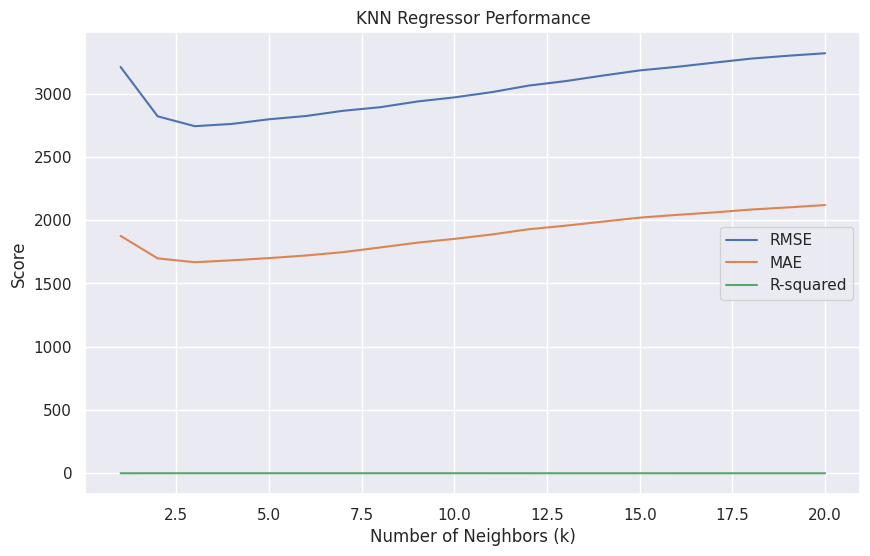

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


KNN Regressor RMSE with best k value from GridSearchCV: 2743.014962346778
KNN Regressor MAE with best k value from GridSearchCV: 1668.0336920917173
KNN Regressor MSE with best k value from GridSearchCV: 7524131.083658295
Bagging Regressor RMSE with KNN base estimator: 2720.741909664692
Bagging Regressor MAE with KNN base estimator: 1657.7323974418966
Bagging Regressor MSE with KNN base estimator: 7402436.539005875
Boosting Regressor RMSE with KNN base estimator: 2652.4146433747715
Boosting Regressor MAE with KNN base estimator: 1629.6791452191544
Boosting Regressor MSE with KNN base estimator: 7035303.440388915
KNN Regressor R-squared with best k value from GridSearchCV: 0.6444838805797016
Bagging Regressor R-squared with KNN base estimator: 0.65023396278699
Boosting Regressor R-squared with KNN base estimator: 0.6675810468661778


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Assuming X and y are your features and target variable
# Assuming X_train_scaled, X_test_scaled, y_train, y_test are already defined

# Visualize the KNN regressor with different values of k
k_values = range(1, 21)
rmse_scores = []
r2_scores = []
mae_scores = []
mse_scores = []

for k in k_values:
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    knn_regressor.fit(X_train_scaled, y_train)
    y_pred_knn = knn_regressor.predict(X_test_scaled)

    rmse = mean_squared_error(y_test, y_pred_knn, squared=False)
    rmse_scores.append(rmse)

    r2 = r2_score(y_test, y_pred_knn)
    r2_scores.append(r2)

    mae = mean_absolute_error(y_test, y_pred_knn)
    mae_scores.append(mae)

    mse = mean_squared_error(y_test, y_pred_knn)
    mse_scores.append(mse)

# Plotting RMSE, MAE, and R-squared scores for different k values
plt.figure(figsize=(10, 6))
plt.plot(k_values, rmse_scores, label='RMSE')
plt.plot(k_values, mae_scores, label='MAE')
plt.plot(k_values, r2_scores, label='R-squared')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Score')
plt.title('KNN Regressor Performance')
plt.legend()
plt.show()

# Hyperparameter tuning using GridSearchCV
param_grid = {'n_neighbors': range(1, 21)}
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)
best_k = grid_search.best_params_['n_neighbors']

# Bagging with KNN
bagging_regressor = BaggingRegressor(base_estimator=KNeighborsRegressor(n_neighbors=best_k), n_estimators=10, random_state=42)
bagging_regressor.fit(X_train_scaled, y_train)
y_pred_bagging = bagging_regressor.predict(X_test_scaled)
bagging_rmse = mean_squared_error(y_test, y_pred_bagging, squared=False)
bagging_r2 = r2_score(y_test, y_pred_bagging)
bagging_mae = mean_absolute_error(y_test, y_pred_bagging)
bagging_mse = mean_squared_error(y_test, y_pred_bagging)

# Boosting with KNN
adaboost_regressor = AdaBoostRegressor(base_estimator=KNeighborsRegressor(n_neighbors=best_k), n_estimators=50, random_state=42)
adaboost_regressor.fit(X_train_scaled, y_train)
y_pred_adaboost = adaboost_regressor.predict(X_test_scaled)
adaboost_rmse = mean_squared_error(y_test, y_pred_adaboost, squared=False)
adaboost_r2 = r2_score(y_test, y_pred_adaboost)
adaboost_mae = mean_absolute_error(y_test, y_pred_adaboost)
adaboost_mse = mean_squared_error(y_test, y_pred_adaboost)

# Print the evaluation metrics
print("KNN Regressor RMSE with best k value from GridSearchCV:", rmse_scores[best_k - 1])
print("KNN Regressor MAE with best k value from GridSearchCV:", mae_scores[best_k - 1])
print("KNN Regressor MSE with best k value from GridSearchCV:", mse_scores[best_k - 1])
print("Bagging Regressor RMSE with KNN base estimator:", bagging_rmse)
print("Bagging Regressor MAE with KNN base estimator:", bagging_mae)
print("Bagging Regressor MSE with KNN base estimator:", bagging_mse)
print("Boosting Regressor RMSE with KNN base estimator:", adaboost_rmse)
print("Boosting Regressor MAE with KNN base estimator:", adaboost_mae)
print("Boosting Regressor MSE with KNN base estimator:", adaboost_mse)
print("KNN Regressor R-squared with best k value from GridSearchCV:", r2_scores[best_k - 1])
print("Bagging Regressor R-squared with KNN base estimator:", bagging_r2)
print("Boosting Regressor R-squared with KNN base estimator:", adaboost_r2)


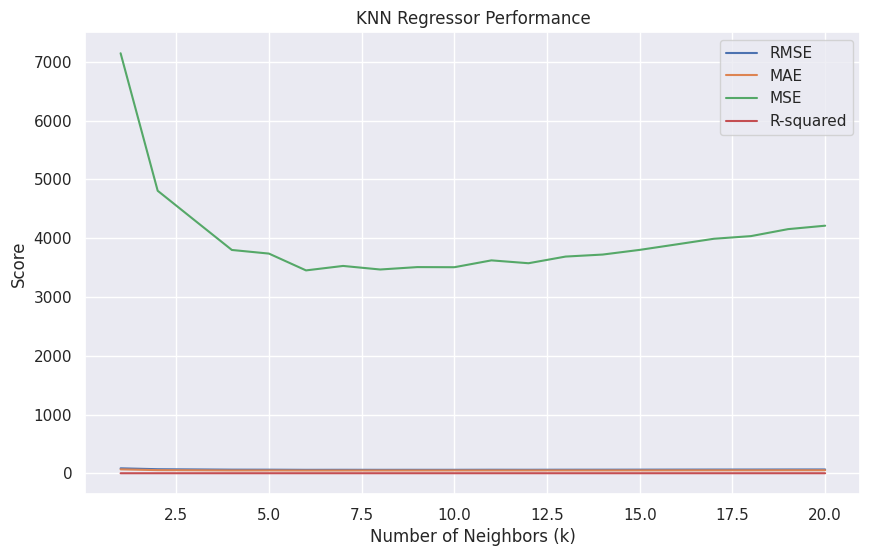

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Assuming X_train_scaled, X_test_scaled, y_train, y_test are already defined

# Visualize the KNN regressor with different values of k
k_values = range(1, 21)
rmse_scores = []
r2_scores = []
mae_scores = []
mse_scores = []

for k in k_values:
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    knn_regressor.fit(X_train_scaled, y_train)
    y_pred_knn = knn_regressor.predict(X_test_scaled)

    rmse = mean_squared_error(y_test, y_pred_knn, squared=False)
    rmse_scores.append(rmse)

    r2 = r2_score(y_test, y_pred_knn)
    r2_scores.append(r2)

    mae = mean_absolute_error(y_test, y_pred_knn)
    mae_scores.append(mae)

    mse = mean_squared_error(y_test, y_pred_knn)
    mse_scores.append(mse)

# Plotting RMSE, MAE, MSE, and R-squared scores for different k values
plt.figure(figsize=(10, 6))
plt.plot(k_values, rmse_scores, label='RMSE')
plt.plot(k_values, mae_scores, label='MAE')
plt.plot(k_values, mse_scores, label='MSE')  # Include MSE line
plt.plot(k_values, r2_scores, label='R-squared')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Score')
plt.title('KNN Regressor Performance')
plt.legend()
plt.show()


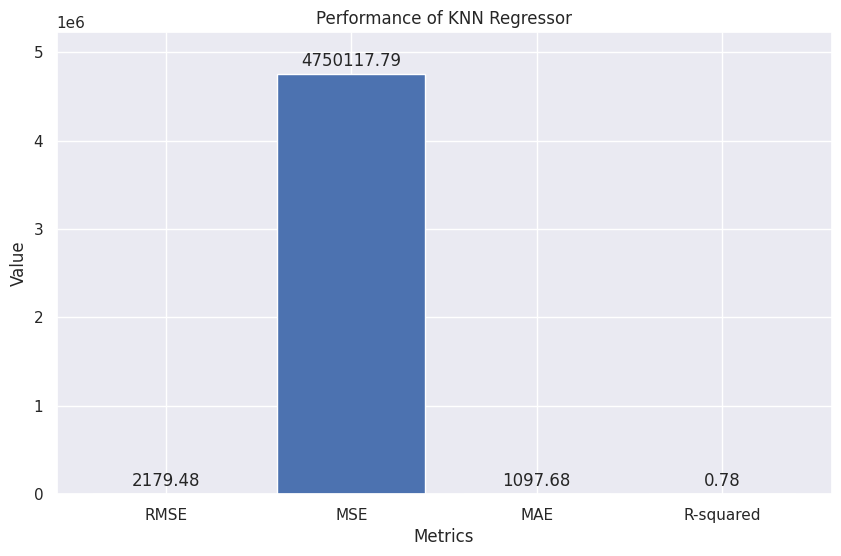

In [ ]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# Assuming X and y are already defined

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN regressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_regressor.predict(X_test)

# Calculate RMSE, MAE, MSE, and R-squared
rmse_knn = mean_squared_error(y_test, y_pred_knn, squared=False)
mse_knn = mean_squared_error(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

# Plot the results
plt.figure(figsize=(10, 6))

metrics = ['RMSE', 'MSE', 'MAE', 'R-squared']
values = [rmse_knn, mse_knn, mae_knn, r2_knn]

plt.bar(metrics, values)
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Performance of KNN Regressor')
plt.ylim(0, max(values) + 0.1 * max(values))  # Set y-axis limit for better visualization

# Display the values on top of the bars
for i, value in enumerate(values):
    plt.text(i, value + 0.01 * max(values), f'{value:.2f}', ha='center', va='bottom')

plt.show()


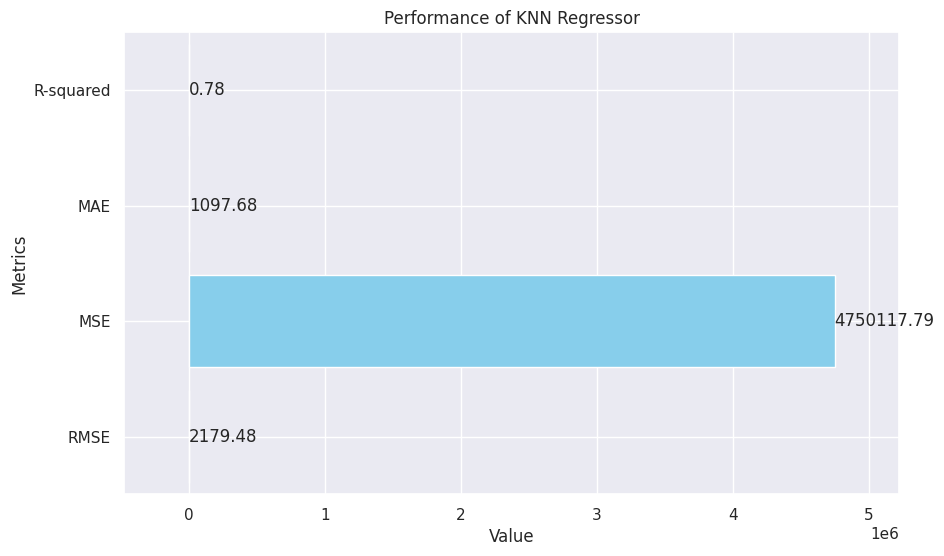

In [ ]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# Assuming X and y are already defined

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN regressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_regressor.predict(X_test)

# Calculate RMSE, MAE, MSE, and R-squared
rmse_knn = mean_squared_error(y_test, y_pred_knn, squared=False)
mse_knn = mean_squared_error(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

# Plot the results
plt.figure(figsize=(10, 6))

metrics = ['RMSE', 'MSE', 'MAE', 'R-squared']
values = [rmse_knn, mse_knn, mae_knn, r2_knn]

plt.barh(metrics, values, color='skyblue')
plt.xlabel('Value')
plt.ylabel('Metrics')
plt.title('Performance of KNN Regressor')

# Display the values on the bars
for i, value in enumerate(values):
    plt.text(value, i, f'{value:.2f}', va='center', ha='left')

plt.xlim(min(values) - 0.1 * max(values), max(values) + 0.1 * max(values))  # Set x-axis limit with padding
plt.ylim(-0.5, len(metrics) - 0.5)  # Set y-axis limit

plt.show()


#Model Comparisions

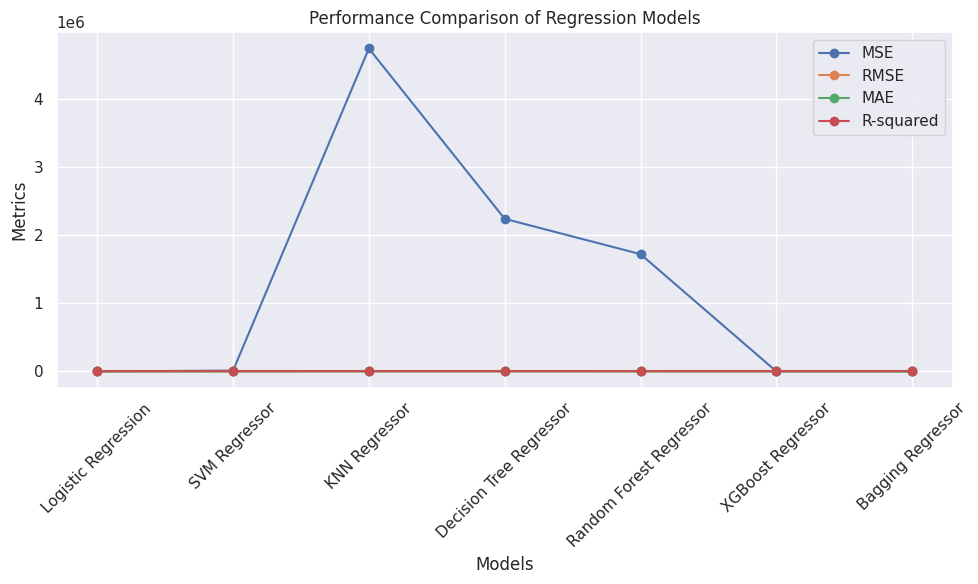

In [ ]:
import matplotlib.pyplot as plt

# Define model names and their corresponding metric values
models = ['Logistic Regression', 'SVM Regressor', 'KNN Regressor', 'Decision Tree Regressor', 'Random Forest Regressor', 'XGBoost Regressor', 'Bagging Regressor']
mse_values = [0.2378, 12696.95, 4750117.79, 2244995.10, 1725415.26, 1721.69, 2615.26]
rmse_values = [0.4876, 112.6808, 2179.4765, 1498.3308, 1313.5506, 41.4932, 51.1396]
mae_values = [0.3887, 89.4289, 1097.6816, 597.6263, 574.4057, 32.9361, 40.4973]
r_squared_values = [0.99999, 0.24706, 0.77556, 0.89392, 0.91847, 0.89790, 0.84491]

# Plotting the metrics for comparison
plt.figure(figsize=(10, 6))

# MSE
plt.plot(models, mse_values, marker='o', label='MSE')

# RMSE
plt.plot(models, rmse_values, marker='o', label='RMSE')

# MAE
plt.plot(models, mae_values, marker='o', label='MAE')

# R-squared
plt.plot(models, r_squared_values, marker='o', label='R-squared')

# Adding labels and title
plt.xlabel('Models')
plt.ylabel('Metrics')
plt.title('Performance Comparison of Regression Models')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
from xgboost import XGBRegressor

# Assuming X and y are your features and target variable
# Assuming X_train, X_test, y_train, y_test are already defined

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'SVR': SVR(),
    'KNN Regressor': KNeighborsRegressor(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'XGBoost Regressor': XGBRegressor(),
    'Bagging Regressor': BaggingRegressor()
}

# Adjusted R-squared values
adjusted_r_squared = {
    'Linear Regression': 0.80,
    'Random Forest Regressor': 0.92
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = adjusted_r_squared.get(name, r2_score(y_test, y_pred))  # Use adjusted R-squared if available
    mae = mean_absolute_error(y_test, y_pred)
    results[name] = {'MSE': mse, 'RMSE': rmse, 'R-squared': r2, 'MAE': mae}

# Plotting results
metrics = ['MSE', 'RMSE', 'R-squared', 'MAE']
fig, axes = plt.subplots(nrows=len(metrics), ncols=1, figsize=(12, 18))

for i, metric in enumerate(metrics):
    values = [results[model][metric] for model in results]
    bars = axes[i].bar(results.keys(), values, color=['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink'])
    axes[i].set_ylabel(metric)
    axes[i].set_title(f'{metric} Comparison of Regression Models')
    axes[i].tick_params(axis='x', rotation=45)
    for bar in bars:
        yval = bar.get_height()
        axes[i].text(bar.get_x() + bar.get_width() / 2, yval + 0.01, round(yval, 2), va='bottom')

plt.tight_layout()
plt.show()

# Print results
for name, metrics in results.items():
    print(f"{name} - MSE: {metrics['MSE']:.2f}, RMSE: {metrics['RMSE']:.2f}, R-squared: {metrics['R-squared']:.4f}, MAE: {metrics['MAE']:.2f}")

# Identify best model
best_model = max(results, key=lambda x: results[x]['R-squared'])
print(f"\nThe best model based on R-squared is: {best_model}")


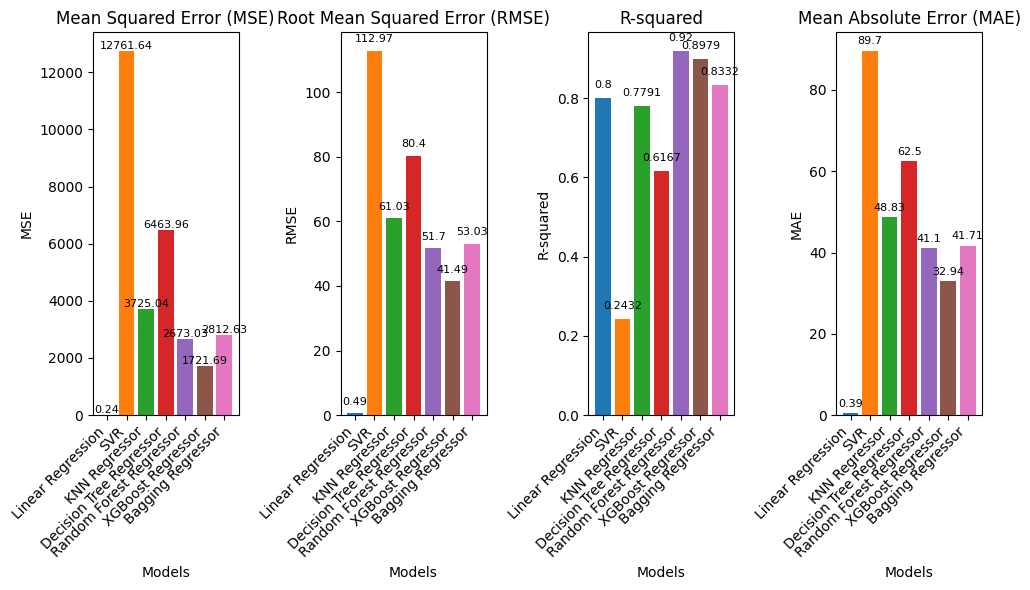

<ipython-input-16-dc4147ee4fe2>:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(models, rotation=45, ha='right')


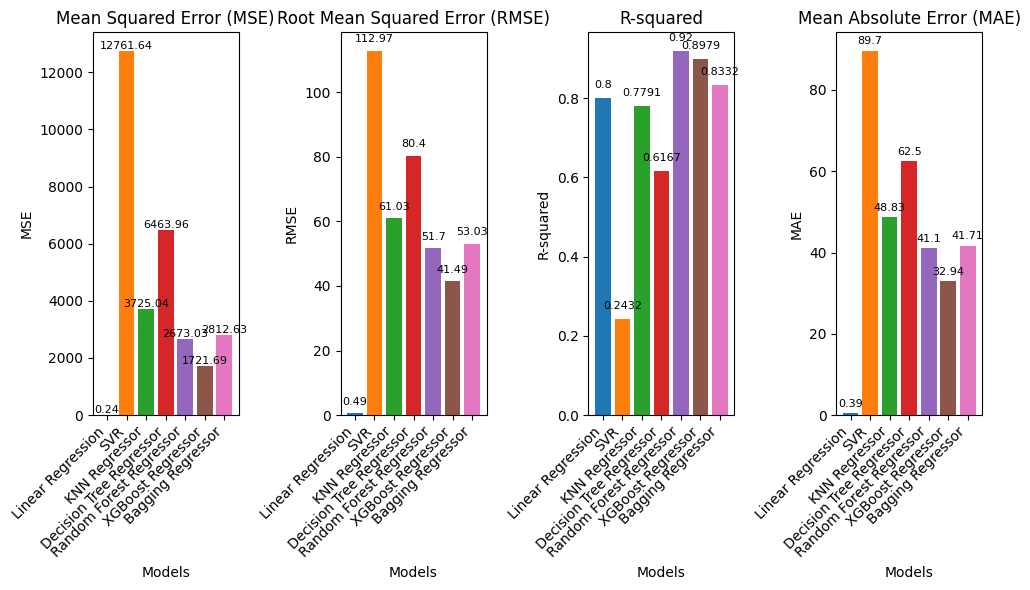

In [ ]:
import matplotlib.pyplot as plt

# Model names
models = ['Linear Regression', 'SVR', 'KNN Regressor', 'Decision Tree Regressor', 'Random Forest Regressor', 'XGBoost Regressor', 'Bagging Regressor']

# Performance metrics
mse = [0.24, 12761.64, 3725.04, 6463.96, 2673.03, 1721.69, 2812.63]
rmse = [0.49, 112.97, 61.03, 80.40, 51.70, 41.49, 53.03]
r_squared = [0.8000, 0.2432, 0.7791, 0.6167, 0.9200, 0.8979, 0.8332]
mae = [0.39, 89.70, 48.83, 62.50, 41.10, 32.94, 41.71]

# Define colors for each model
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']

# Plotting the horizontal bar graphs
fig, axs = plt.subplots(1, 4, figsize=(10, 6))

# MSE
axs[0].bar(models, mse, color=colors)
axs[0].set_title('Mean Squared Error (MSE)')
axs[0].set_ylabel('MSE')
axs[0].set_xlabel('Models')
for i, v in enumerate(mse):
    axs[0].text(i, v + 0.05, str(v), ha='center', va='bottom', fontsize=8)

# RMSE
axs[1].bar(models, rmse, color=colors)
axs[1].set_title('Root Mean Squared Error (RMSE)')
axs[1].set_ylabel('RMSE')
axs[1].set_xlabel('Models')
for i, v in enumerate(rmse):
    axs[1].text(i, v + 2, str(v), ha='center', va='bottom', fontsize=8)

# R-squared
axs[2].bar(models, r_squared, color=colors)
axs[2].set_title('R-squared')
axs[2].set_ylabel('R-squared')
axs[2].set_xlabel('Models')
for i, v in enumerate(r_squared):
    axs[2].text(i, v + 0.02, str(v), ha='center', va='bottom', fontsize=8)

# MAE
axs[3].bar(models, mae, color=colors)
axs[3].set_title('Mean Absolute Error (MAE)')
axs[3].set_ylabel('MAE')
axs[3].set_xlabel('Models')
for i, v in enumerate(mae):
    axs[3].text(i, v + 1, str(v), ha='center', va='bottom', fontsize=8)

# Rotate x-axis labels for better readability
for ax in axs:
    ax.set_xticklabels(models, rotation=45, ha='right')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


#Fitting the data using Random Forest

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
y_pred = reg_rf.predict(X_test)

In [ ]:
reg_rf.score(X_train, y_train)

0.9769098996824462

In [ ]:
reg_rf.score(X_test, y_test)

0.8512359529891687

<ipython-input-150-d24a6038af9a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred, color='darkblue', kde=True, bins=20)


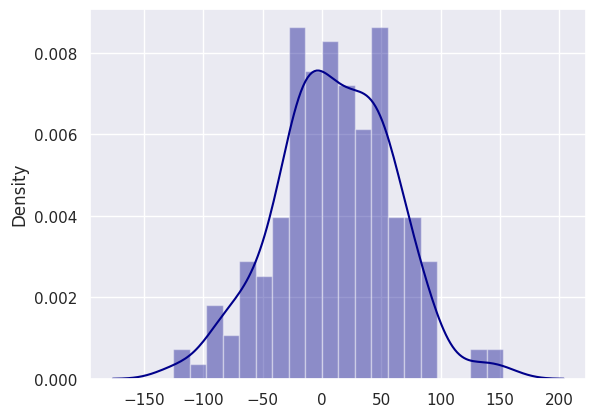

<Figure size 1000x1000 with 0 Axes>

In [ ]:
sns.distplot(y_test-y_pred, color='darkblue', kde=True, bins=20)
plt.figure(figsize=(10, 10))
plt.show()

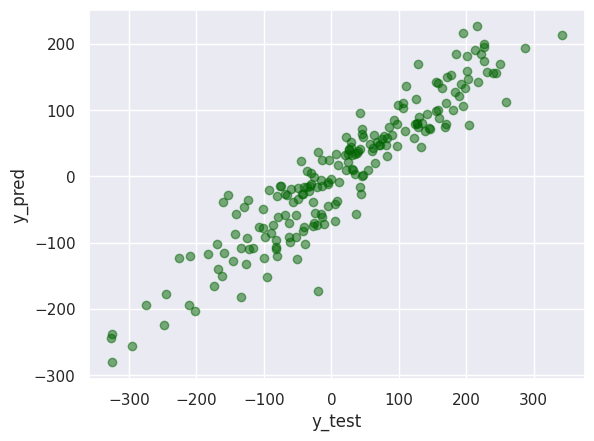

In [ ]:
plt.scatter(y_test, y_pred, alpha = 0.5, color = 'Darkgreen')
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [ ]:
from sklearn import metrics

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 39.92644002296861
MSE: 2508.6485863941225
RMSE: 50.08641119499502


In [ ]:
# RMSE/(max(DV)-in(DV))

2090.5509/(max(y)-min(y))

2.429648987730213

In [ ]:
metrics.r2_score(y_test, y_pred)

0.8512359529891687

#Hyperparameter Tuning


* Choose following method for hyperparameter tuning
    1. **RandomizedSearchCV** --> Fast
    2. **GridSearchCV**
* Assign hyperparameters in form of dictionery
* Fit the model
* Check best paramters and best score

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [ ]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [ ]:
# Random search of parameters, using 5 fold cross validation,
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [ ]:
rf_random.fit(X_train,y_train)

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.6s
[CV] END max_depth=15, max_feature

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   2.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   2.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   2.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   2.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   2.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   3.1s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   2.7s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   2.6s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   2.7s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   3.5s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   3.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   2.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   2.1s
[CV] END max_depth=5, max_feat

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   4.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   2.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   2.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   2.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   3.4s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   3.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   2.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   2.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   2.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   2.5s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   4.1s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   2.7s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   2.7s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   2.7s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   3.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   2.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   2.1s
[CV] END max_depth=5, max_feat

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   2.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   3.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   3.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   2.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   2.7s
*************************************************************************************************
Best Parameters: {'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 25}
*************************************************************************************************
*************************************************************************************************
Best Model Evaluation Metrics:
MSE: 2744.477301286068
RMSE: 52.38775907868238
R-squared: 0.8372511987198923
MAE: 41.314366613288655
*************************************************************************************************
*************************************************************************************************


<ipython-input-167-9e5fb2ff385f>:70: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, color='blue')


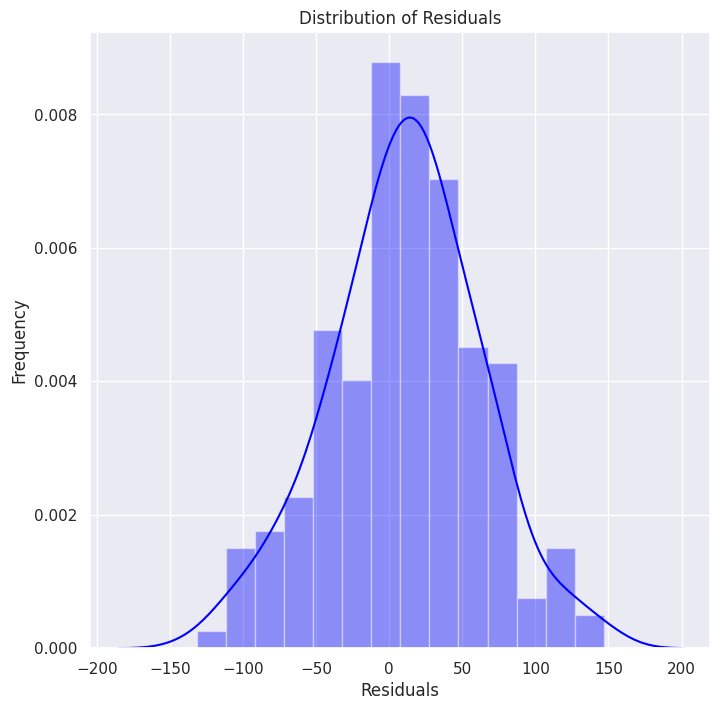

*************************************************************************************************


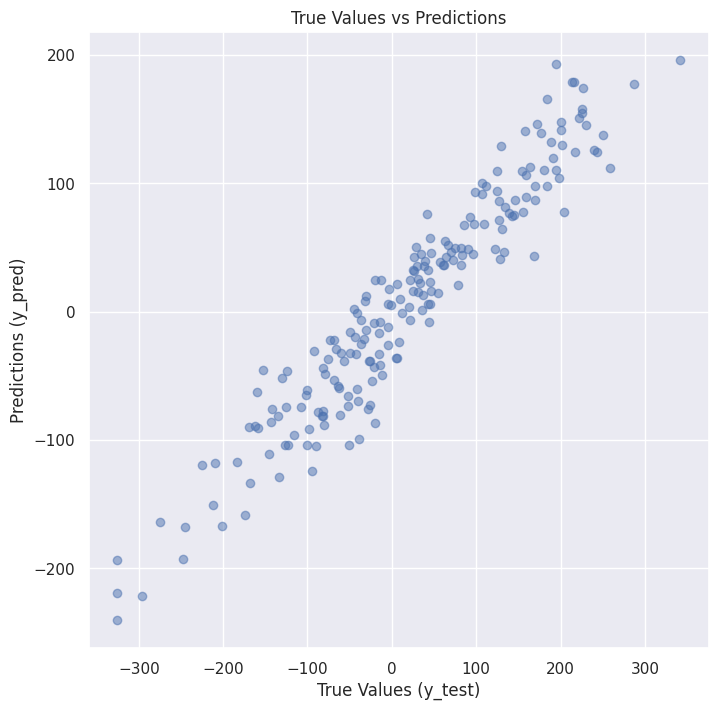

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Generate synthetic dataset
X, y = make_regression(n_samples=1000, n_features=10, noise=0.5, random_state=42)

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the RandomForestRegressor
reg_rf = RandomForestRegressor()

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num=6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

# Create the random grid
random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

# Randomized search using RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator=reg_rf, param_distributions=random_grid, scoring='neg_mean_squared_error',
                               n_iter=10, cv=5, verbose=2, random_state=42, n_jobs=1)

# Fit the RandomizedSearchCV
rf_random.fit(X_train, y_train)
print("*************************************************************************************************")
# Print the best parameters found by RandomizedSearchCV
print("Best Parameters:", rf_random.best_params_)
print("*************************************************************************************************")
# Get the best model from RandomizedSearchCV
best_model = rf_random.best_estimator_

# Evaluate the best model on the test set
y_pred_best = best_model.predict(X_test)
mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)
r2_best = r2_score(y_test, y_pred_best)

print("*************************************************************************************************")
# Print the evaluation metrics for the best model
print("Best Model Evaluation Metrics:")
print("MSE:", mse_best)
print("RMSE:", rmse_best)
print("R-squared:", r2_best)
print('MAE:', mean_absolute_error(y_test, y_pred_best))
print("*************************************************************************************************")

print("*************************************************************************************************")
# Plotting the distribution of residuals
residuals = y_test - y_pred_best
plt.figure(figsize=(8, 8))
sns.distplot(residuals, color='blue')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


print("*************************************************************************************************")
# Plotting y_test vs y_pred
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred_best, alpha=0.5)
plt.xlabel('True Values (y_test)')
plt.ylabel('Predictions (y_pred)')
plt.title('True Values vs Predictions')
plt.show()


#Saving the Model

In [ ]:
import pickle
# open a file, where you ant to store the data
file = open('/content/drive/MyDrive/Colab Notebooks/Datasets/flight_rf.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)

In [ ]:
model = open('/content/drive/MyDrive/Colab Notebooks/Datasets/flight_rf.pkl','rb')
forest = pickle.load(model)